In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [43]:

import numpy as np
import pandas as pd
import pickle
import numpy as np
import random
import time
import os
#os.environ["OPENCV_IO_MAX_IMAGE_PIXELS"] = pow(2,40).__str__()
import cv2
from tqdm import tqdm

import tensorflow as tf
from tensorflow.python.keras import Sequential
from tensorflow.keras import layers, optimizers
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, LearningRateScheduler
from IPython.display import display
from tensorflow.keras import backend as K
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from keras import optimizers
from sklearn.metrics import classification_report, confusion_matrix

In [40]:
dataset_dir = "drive/My Drive/HAM10000/HAM10000_Gray_Categorized/"
work_dir = "drive/My Drive/HAM10000/"

In [4]:
list_categories = ['akiec','bcc','bkl','df','mel','nv','vasc']
num_classes = len(list_categories)
print('num_classes =', num_classes)

num_classes = 7


In [ ]:
list_filename = []

for category in list_categories:
    img_dir = dataset_dir+category
    list_filename_single_dir = os.listdir(img_dir)
    list_filename.append(list_filename_single_dir)
    print(img_dir, "=", len(list_filename_single_dir))

print('len(list_filename) =', len(list_filename))
print('len(list_filename[0]) =', len(list_filename[0]))
print('len(list_filename[1]) =', len(list_filename[1]))
print('len(list_filename[2]) =', len(list_filename[2]))
print('len(list_filename[3]) =', len(list_filename[3]))
print('len(list_filename[4]) =', len(list_filename[4]))
print('len(list_filename[5]) =', len(list_filename[5]))
print('len(list_filename[6]) =', len(list_filename[6]))

In [ ]:
#np_imageset = np.empty((0, 450, 600), int)
list_imageset = []
list_label = []

for i in range(115):
    for c in range(len(list_categories)):
        img_dir = dataset_dir+list_categories[c]+"/"+list_filename[c][i]
        #print(img_dir)
        image = cv2.imread(img_dir, 0)
        image_norm = image/255.0
        #print(image.shape)
        #np.append(np_imageset, [image], axis = 0)
        list_imageset.append(image_norm)
        list_label.append(c)
    print(i)
    #break

In [47]:
print('no. of images =',len(list_imageset))
print('image height =',len(list_imageset[0]))
print('image width =',len(list_imageset[0][0]))

no. of images = 805
image height = 450
image width = 600


In [8]:
SPLIT_INDEX = int(115*0.1) # no. of images in df group = 115 (lowest)
SPLIT_INDEX

11

In [9]:
list_test_imageset = list_imageset[:SPLIT_INDEX]
list_val_imageset = list_imageset[SPLIT_INDEX:SPLIT_INDEX+SPLIT_INDEX]
list_train_imageset = list_imageset[SPLIT_INDEX+SPLIT_INDEX:]

list_test_label = list_label[:SPLIT_INDEX]
list_val_label = list_label[SPLIT_INDEX:SPLIT_INDEX+SPLIT_INDEX]
list_train_label = list_label[SPLIT_INDEX+SPLIT_INDEX:]

print('len(list_test_imageset) =', len(list_test_imageset))
print('len(list_val_imageset) =', len(list_val_imageset))
print('len(list_train_imageset) =', len(list_train_imageset))

print('\nlen(list_test_label) =', len(list_test_label))
print('len(list_val_label) =', len(list_val_label))
print('len(list_train_label) =', len(list_train_label))

print('\nTotal no. of images =', len(list_test_imageset)+len(list_val_imageset)+len(list_train_imageset))

len(list_test_imageset) = 11
len(list_val_imageset) = 11
len(list_train_imageset) = 783

len(list_test_label) = 11
len(list_val_label) = 11
len(list_train_label) = 783

Total no. of images = 805


In [10]:
np_test_imageset = np.array(list_test_imageset)
np_val_imageset = np.array(list_val_imageset)
np_train_imageset = np.array(list_train_imageset)

np_test_label = np.array(list_test_label)
np_val_label = np.array(list_val_label)
np_train_label = np.array(list_train_label)

print('np_test_imageset.shape =', np_test_imageset.shape)
print('np_val_imageset.shape =', np_val_imageset.shape)
print('np_train_imageset.shape =', np_train_imageset.shape)

print('\nnp_test_label.shape =', np_test_label.shape)
print('np_val_label.shape =', np_val_label.shape)
print('np_train_label.shape =', np_train_label.shape)

np_test_imageset.shape = (11, 450, 600)
np_val_imageset.shape = (11, 450, 600)
np_train_imageset.shape = (783, 450, 600)

np_test_label.shape = (11,)
np_val_label.shape = (11,)
np_train_label.shape = (783,)


In [42]:
# Saving files:
np.save(work_dir+"np_test_imageset.pkl", np_test_imageset, allow_pickle=True)
np.save(work_dir+"np_val_imageset.pkl", np_val_imageset, allow_pickle=True)
np.save(work_dir+"np_train_imageset.pkl", np_train_imageset, allow_pickle=True)

np.save(work_dir+"np_test_label.pkl", np_test_label, allow_pickle=True)
np.save(work_dir+"np_val_label.pkl", np_val_label, allow_pickle=True)
np.save(work_dir+"np_train_label.pkl", np_train_label, allow_pickle=True)

In [45]:
# Loading files:
np_test_imageset = np.load(work_dir+"np_test_imageset.pkl.npy", allow_pickle=True)
np_val_imageset = np.load(work_dir+"np_val_imageset.pkl.npy", allow_pickle=True)
np_train_imageset = np.load(work_dir+"np_train_imageset.pkl.npy", allow_pickle=True)

np_test_label = np.load(work_dir+"np_test_label.pkl.npy", allow_pickle=True)
np_val_label = np.load(work_dir+"np_val_label.pkl.npy", allow_pickle=True)
np_train_label = np.load(work_dir+"np_train_label.pkl.npy", allow_pickle=True)

In [46]:
final_test_imageset = np.expand_dims(np_test_imageset, axis = 3)
final_val_imageset = np.expand_dims(np_val_imageset, axis = 3)
final_train_imageset = np.expand_dims(np_train_imageset, axis = 3)

test_label2 = np.expand_dims(np_test_label, axis = 1)
val_label2 = np.expand_dims(np_val_label, axis = 1)
train_label2 = np.expand_dims(np_train_label, axis = 1)

print('final_test_imageset.shape =', final_test_imageset.shape)
print('final_val_imageset.shape =', final_val_imageset.shape)
print('final_train_imageset.shape =', final_train_imageset.shape)

print('\ntest_label2.shape =', test_label2.shape)
print('val_label2.shape =', val_label2.shape)
print('train_label2.shape =', train_label2.shape)

final_test_imageset.shape = (11, 450, 600, 1)
final_val_imageset.shape = (11, 450, 600, 1)
final_train_imageset.shape = (783, 450, 600, 1)

test_label2.shape = (11, 1)
val_label2.shape = (11, 1)
train_label2.shape = (783, 1)


In [12]:
final_test_label = tf.keras.utils.to_categorical(test_label2, num_classes)
final_val_label = tf.keras.utils.to_categorical(val_label2, num_classes)
final_train_label = tf.keras.utils.to_categorical(train_label2, num_classes)

print('final_test_label.shape =',final_test_label.shape)
print('final_val_label.shape =',final_val_label.shape)
print('final_train_label.shape =',final_train_label.shape)

final_test_label.shape = (11, 7)
final_val_label.shape = (11, 7)
final_train_label.shape = (783, 7)


In [13]:
def res_block(X, filter, stage):
    
  # CONVOLUTIONAL BLOCK
  X_copy = X
  f1 , f2, f3 = filter

  # Main Path
  X = Conv2D(f1, (1,1), strides = (1,1), name ='res_'+str(stage)+'_conv_a', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = MaxPool2D((2,2))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_a')(X)
  X = Activation('relu')(X) 

  X = Conv2D(f2, kernel_size = (3,3), strides =(1,1), padding = 'same', name ='res_'+str(stage)+'_conv_b', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_b')(X)
  X = Activation('relu')(X) 

  X = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_conv_c', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_c')(X)

  # Short path
  X_copy = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_conv_copy', kernel_initializer= glorot_uniform(seed = 0))(X_copy)
  X_copy = MaxPool2D((2,2))(X_copy)
  X_copy = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_copy')(X_copy)

  # Add data from main and short paths
  X = Add()([X,X_copy])
  X = Activation('relu')(X)

    
    
  # IDENTITY BLOCK 1
  X_copy = X
    
  # Main Path
  X = Conv2D(f1, (1,1),strides = (1,1), name ='res_'+str(stage)+'_identity_1_a', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_1_a')(X)
  X = Activation('relu')(X) 

  X = Conv2D(f2, kernel_size = (3,3), strides =(1,1), padding = 'same', name ='res_'+str(stage)+'_identity_1_b', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_1_b')(X)
  X = Activation('relu')(X) 

  X = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_identity_1_c', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_1_c')(X)

  # Add both paths together (Note that we feed the original input as is hence the name "identity")
  X = Add()([X,X_copy])
  X = Activation('relu')(X)

    
    
  # IDENTITY BLOCK 2
  X_copy = X

  # Main Path
  X = Conv2D(f1, (1,1),strides = (1,1), name ='res_'+str(stage)+'_identity_2_a', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_2_a')(X)
  X = Activation('relu')(X) 

  X = Conv2D(f2, kernel_size = (3,3), strides =(1,1), padding = 'same', name ='res_'+str(stage)+'_identity_2_b', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_2_b')(X)
  X = Activation('relu')(X) 

  X = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_identity_2_c', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_2_c')(X)

  # Add both paths together (Note that we feed the original input as is hence the name "identity")
  X = Add()([X,X_copy])
  X = Activation('relu')(X)

  return X

In [27]:
input_shape = final_train_imageset.shape[1:] #(32,32,1) #np_train_dataset.shape #np.expand_dims(np_train_dataset, axis=1) #

# Input tensor shape
X_input = Input(input_shape)

# Zero-padding
X = ZeroPadding2D((1,1))(X_input)
#X = Input(input_shape)

# Stage #1
X = Conv2D(64, (5,5), strides= (1,1), name = 'conv1', kernel_initializer= glorot_uniform(seed = 0))(X)
#X = Conv2D(64, np_train_dataset.shape[1:3], strides= (2,2), name = 'conv1', kernel_initializer= glorot_uniform(seed = 0), data_format='channels_first')(X)
#X = Conv2D(64, np_train_dataset.shape[1:3], strides= (2,2), name = 'conv1', kernel_initializer= glorot_uniform(seed = 0), data_format='channels_first')(X)
X = BatchNormalization(axis =3, name = 'bn_conv1')(X)
X = Activation('relu')(X)
#print('ok1')
X = MaxPooling2D((3,3), strides= (1,1))(X)
#print('ok2')
# Stage #2
#X = res_block(X, filter= [64,64,256], stage= 2)

# Stage #3
X = res_block(X, filter= [128,512,128], stage = 2)

#X = res_block(X, filter= [256,1024,256], stage = 3)

#X = res_block(X, filter= [512,1024,256], stage = 4)

#X = res_block(X, filter= [256,1024,256], stage = 5)

#X = res_block(X, filter= [64,64,256], stage= 6)

# Average Pooling
X = AveragePooling2D((3,3), name = 'Averagea_Pooling')(X)

# Final layer
X = Flatten()(X)
X = Dense(128, activation = 'relu')(X)
#X = Dropout(0.2)(X)
#X = Dense(128, activation = 'relu')(X)
#X = Dropout(0.1)(X)
#X = Dense(1024, activation = 'relu')(X)
#X = Dense(512, activation = 'relu')(X)
X = Dense(num_classes, activation = 'softmax')(X)


model = Model( inputs= X_input, outputs = X)
model.summary()

Model: "functional_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 450, 600, 1) 0                                            
__________________________________________________________________________________________________
zero_padding2d_1 (ZeroPadding2D (None, 452, 602, 1)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 448, 598, 64) 1664        zero_padding2d_1[0][0]           
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 448, 598, 64) 256         conv1[0][0]                      
_______________________________________________________________________________________

In [28]:
#adam = tf.keras.optimizers.Adam(lr = 0.01) #, beta_1=0.9, beta_2=0.999, amsgrad=False
optimizer = tf.keras.optimizers.Adam(lr = 0.0001, beta_1=0.9, beta_2=0.999, amsgrad=False) #, beta_1=0.9, beta_2=0.999, amsgrad=False
#model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['categorical_accuracy'])

In [29]:
# save the best model with least validation loss
checkpointer_name  = "weights_HAM10000_ResNet.hdf5"
checkpointer = ModelCheckpoint(filepath = "drive/My Drive/HAM10000/"+checkpointer_name, verbose = 1, save_best_only = True)

In [30]:
start_time = time.time()
history = model.fit(final_train_imageset, final_train_label, 
                    shuffle=False, 
                    batch_size = 1, 
                    epochs = 3, 
                    #steps_per_epoch = 2,
                    #validation_split = 0.1, 
                    validation_data = (final_val_imageset,final_val_label),
                    callbacks=[checkpointer]
                    )
elapsed_time = time.time() - start_time
print("\nTime elapsed: ", elapsed_time)

Epoch 1/3
783/783 [==============================] - ETA: 0s - loss: 9.3731 - categorical_accuracy: 0.2363WARNING:tensorflow:Callbacks method `on_test_batch_end` is slow compared to the batch time (batch time: 0.0035s vs `on_test_batch_end` time: 0.1888s). Check your callbacks.

Epoch 00001: val_loss improved from inf to 3.14657, saving model to drive/My Drive/HAM10000/weights_HAM10000_ResNet.hdf5
783/783 [==============================] - 489s 625ms/step - loss: 9.3731 - categorical_accuracy: 0.2363 - val_loss: 3.1466 - val_categorical_accuracy: 0.0909
Epoch 2/3
783/783 [==============================] - ETA: 0s - loss: 1.0299 - categorical_accuracy: 0.6335
Epoch 00002: val_loss did not improve from 3.14657
783/783 [==============================] - 476s 609ms/step - loss: 1.0299 - categorical_accuracy: 0.6335 - val_loss: 3.5906 - val_categorical_accuracy: 0.1818
Epoch 3/3
518/783 [==================>...........] - ETA: 2:40 - loss: 0.3441 - categorical_accuracy: 0.8900

KeyboardInterrupt: ignored

In [31]:
result = model.evaluate(final_test_imageset, final_test_label)
print("Accuracy : {}, Loss: {}".format(result[1], result[0]))

11/11 [==============================] - 2s 205ms/step - loss: 6.2939 - categorical_accuracy: 0.3636
Accuracy : 0.3636363744735718, Loss: 6.293914318084717


In [32]:
model_loaded = load_model(work_dir+checkpointer_name)

In [33]:
result2 = model_loaded.evaluate(final_test_imageset, final_test_label)
print("Accuracy : {}, Loss: {}".format(result2[1], result2[0]))

ResourceExhaustedError: ignored

In [34]:
#Confution Matrix and Classification Report
Y_pred = model_loaded.predict_generator(final_test_imageset, len(final_test_imageset))
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(np_test_label, y_pred))

Confusion Matrix
[[0 2 0 0 0 0 0]
 [0 2 0 0 0 0 0]
 [0 2 0 0 0 0 0]
 [0 2 0 0 0 0 0]
 [0 1 0 0 0 0 0]
 [0 1 0 0 0 0 0]
 [0 1 0 0 0 0 0]]


In [35]:
# Precision [TP/TP+FP] = The ratio of correctly predicted positive observations to the total predicted positive observations.
# Recall (Sensitivity) [TP/TP+FN] = The ratio of correctly predicted positive observations to the all observations in actual class - 'yes'.
# F1 score [F1 Score = 2*(Recall * Precision) / (Recall + Precision)] = The weighted average of Precision and Recall.
# Support = The number of samples of the true response that lie in that class.
print('Classification Report:')
#target_names = ['Mono', 'Di'] # not ['Di', 'Mono']
print(classification_report(np_test_label, y_pred)) #, target_names=target_names))

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.18      1.00      0.31         2
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         1

    accuracy                           0.18        11
   macro avg       0.03      0.14      0.04        11
weighted avg       0.03      0.18      0.06        11



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [36]:
print('Classification Report')
print(classification_report(np_test_label, y_pred, target_names=list_categories))

Classification Report
              precision    recall  f1-score   support

       akiec       0.00      0.00      0.00         2
         bcc       0.18      1.00      0.31         2
         bkl       0.00      0.00      0.00         2
          df       0.00      0.00      0.00         2
         mel       0.00      0.00      0.00         1
          nv       0.00      0.00      0.00         1
        vasc       0.00      0.00      0.00         1

    accuracy                           0.18        11
   macro avg       0.03      0.14      0.04        11
weighted avg       0.03      0.18      0.06        11



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [37]:
# Getting the model history keys 
history.history.keys()

dict_keys(['loss', 'categorical_accuracy', 'val_loss', 'val_categorical_accuracy'])

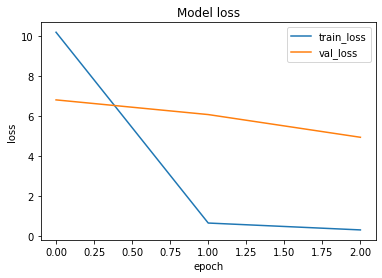

In [38]:
# plot the training artifacts

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss','val_loss'], loc = 'upper right')
plt.show()

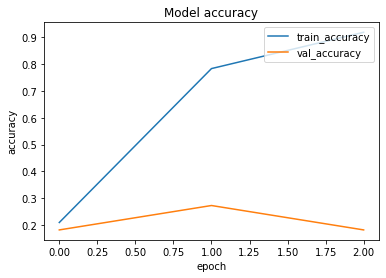

In [39]:
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_accuracy','val_accuracy'], loc = 'upper right')
plt.show()